In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
raw_dataframe = pd.read_csv("pokemon_data_raw.csv", delimiter=",")
cleaned_dataframe = pd.read_csv("pokemon_data_cleaned.csv", delimiter=",")

How many of each type are there?

<BarContainer object of 18 artists>

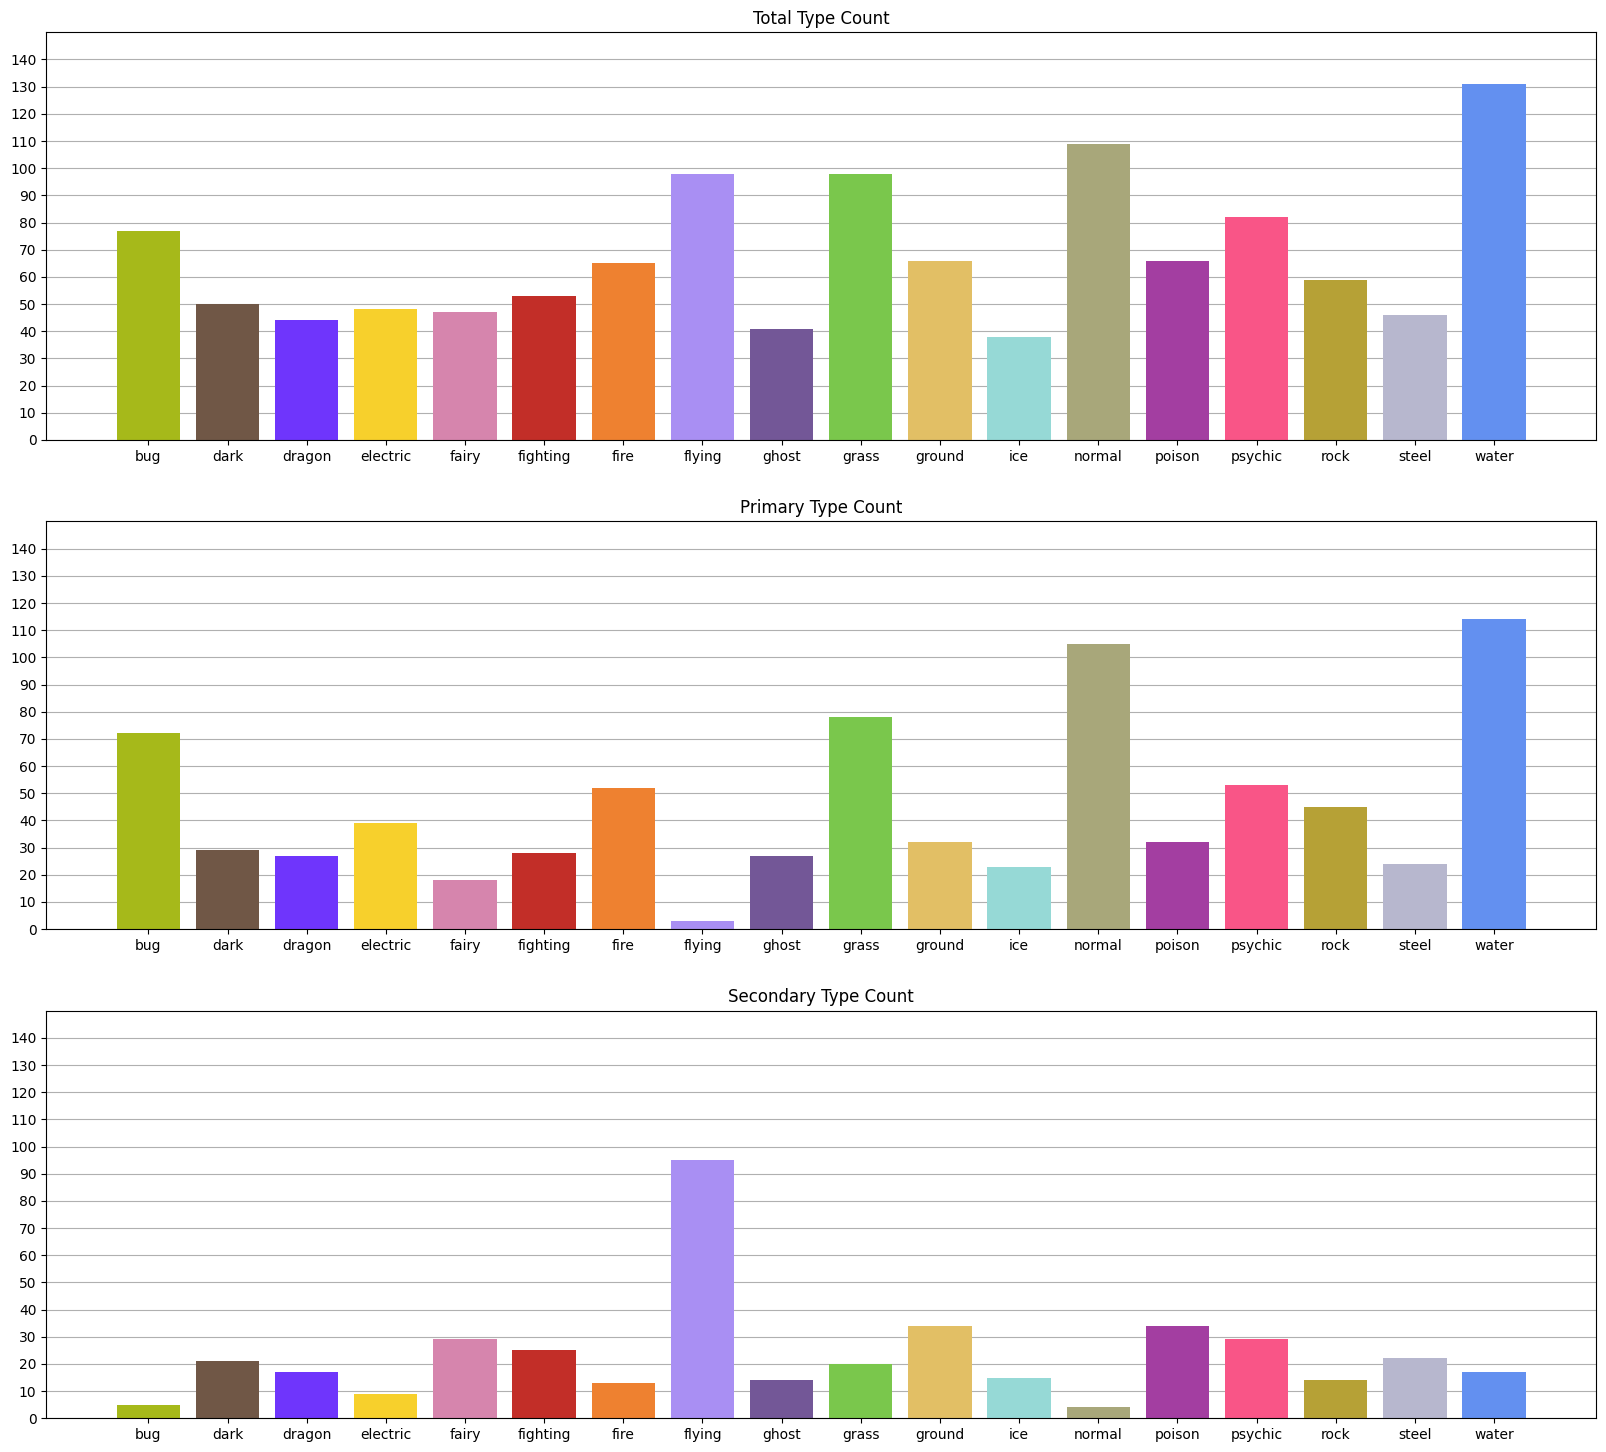

In [154]:
type1_counts = raw_dataframe["type1"].value_counts().to_dict()
type2_counts = raw_dataframe["type2"].value_counts().to_dict()
type_counts = {}

type1_counts = {key: value for key, value in sorted(type1_counts.items())}
type2_counts = {key: value for key, value in sorted(type2_counts.items())}

for key in type1_counts.keys():
    type_counts[key] = type1_counts[key] + type2_counts[key]

# Colours Assigned to each type within Pokemon to make the Graphs look nicer.
type_colours = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28', '#EE8130', '#A98FF3', '#735797', '#7AC74C', '#E2BF65', '#96D9D6', '#A8A77A', '#A33EA1', '#F95587', '#B6A136', '#B7B7CE', '#6390F0']

plt.rcParams['figure.figsize'] = [20, 18]
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")


ax1.set_title("Total Type Count")
ax1.bar(range(len(type_counts)), list(type_counts.values()), color=type_colours)

ax2.set_title("Primary Type Count")
ax2.bar(range(len(type1_counts)), list(type1_counts.values()), color=type_colours)

ax3.set_title("Secondary Type Count")
ax3.bar(range(len(type2_counts)), list(type2_counts.values()), color=type_colours)




What do the average base stats look like for each type?

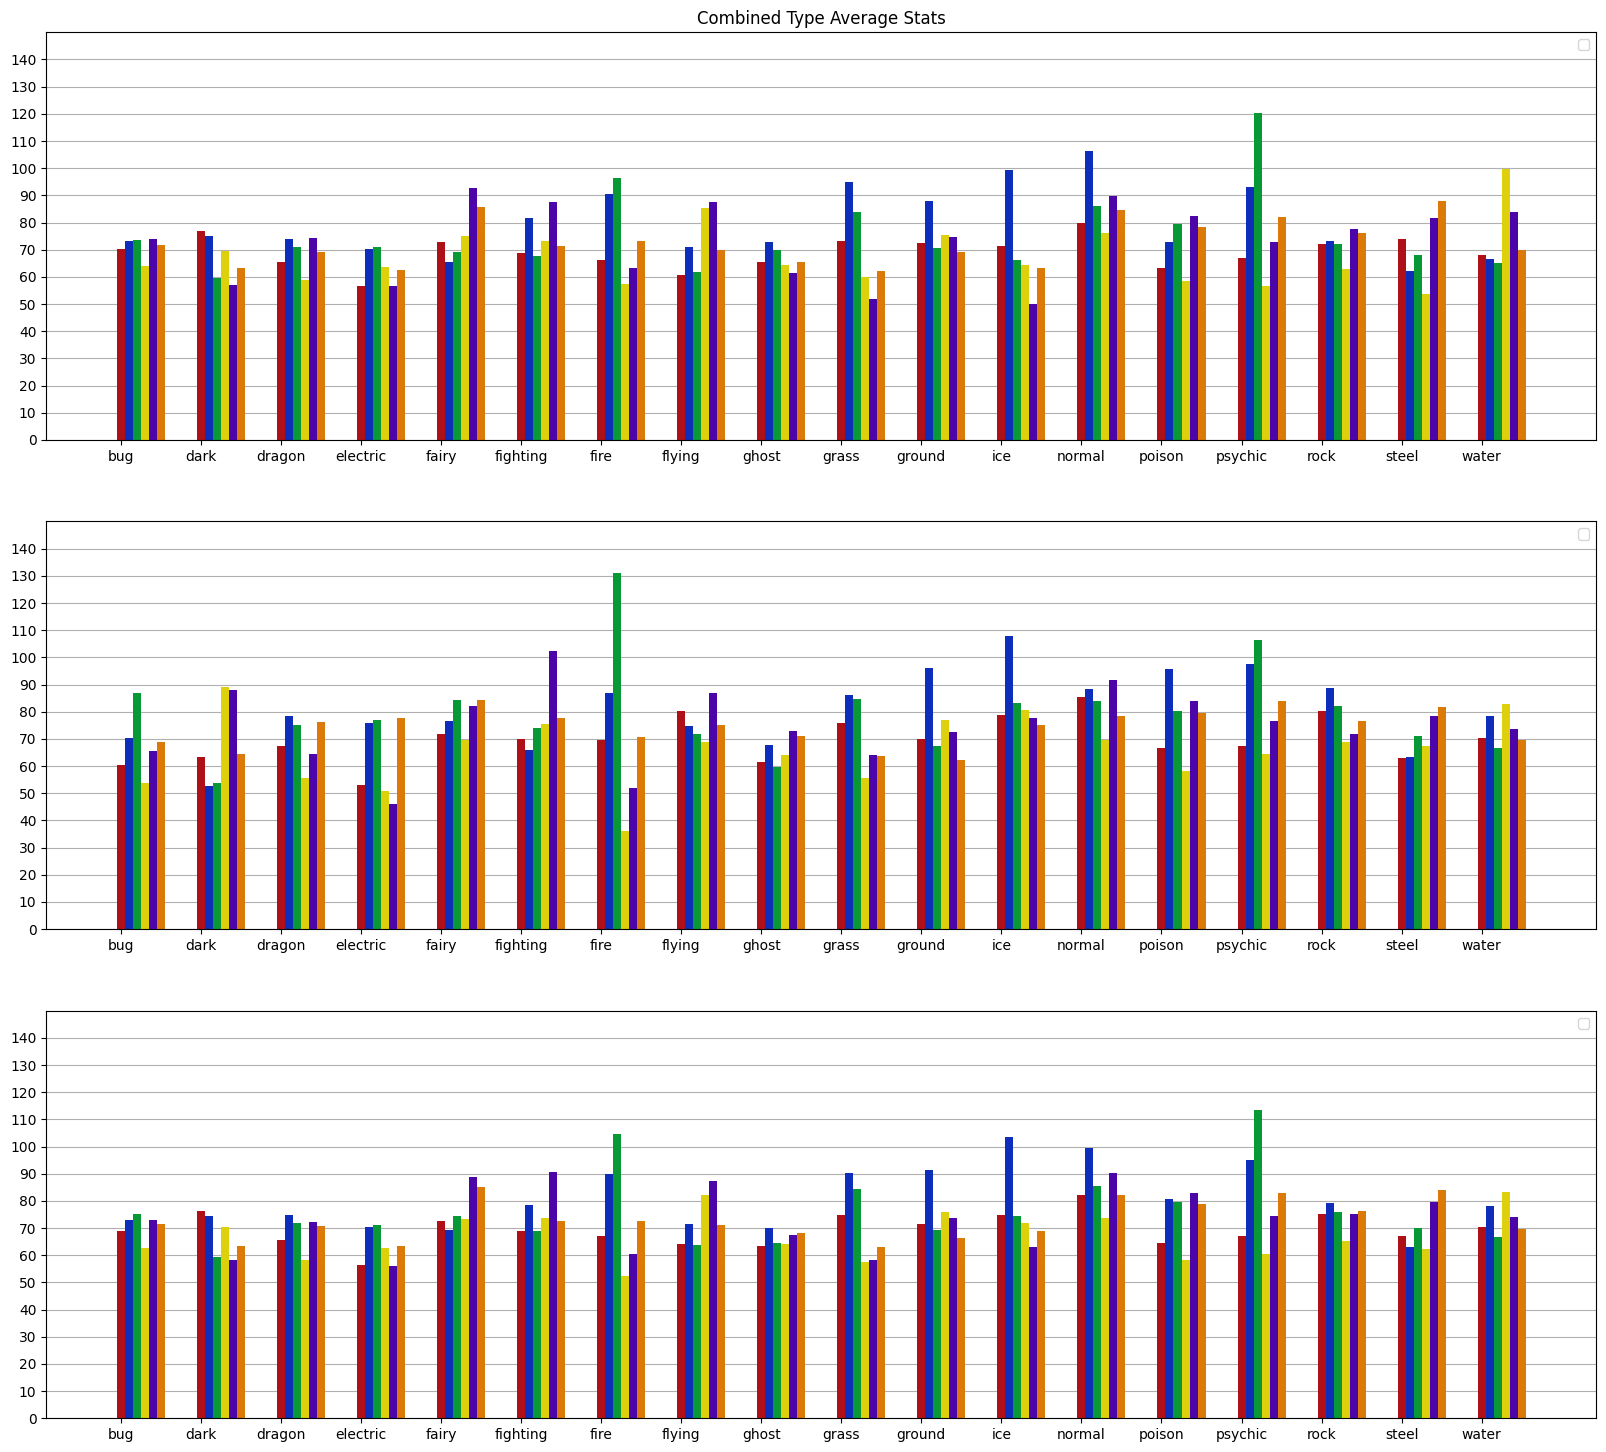

In [ ]:
types = raw_dataframe["type1"].value_counts().to_dict().keys()

# Contained stats are hp, attack, defense, speed, sp_attack, sp_defense, total_count
type1_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
type2_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
combined_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}


stats = ["hp", "attack", "defense", "speed", "sp_attack", "sp_defense"]
stats_dataframe = raw_dataframe[["type1", "type2"] + stats]

for index, row in stats_dataframe.iterrows():
    type1 = row["type1"]
    type2 = row["type2"]

    stat_values = [row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"], 1]

    type1_total_stats[type1] = [x + y for x,y in zip(type1_total_stats[type1], stat_values)]
    combined_total_stats[type1] = [x + y for x,y in zip(combined_total_stats[type1], stat_values)]

    if type2 not in types: continue

    type2_total_stats[type2] = [x + y for x,y in zip(type2_total_stats[type2], stat_values)]
    combined_total_stats[type2] = [x + y for x,y in zip(combined_total_stats[type2], stat_values)]

type1_average_stats = {}
type2_average_stats = {}
combined_average_stats = {}

for poke_type in types:
    type1_average_stats[poke_type] = [round(stat_total / type1_total_stats[poke_type][6], 2) for stat_total in type1_total_stats[poke_type][:-1]]
    type2_average_stats[poke_type] = [round(stat_total / type2_total_stats[poke_type][6], 2) for stat_total in type2_total_stats[poke_type][:-1]]
    combined_average_stats[poke_type] = [round(stat_total / combined_total_stats[poke_type][6], 2) for stat_total in combined_total_stats[poke_type][:-1]]


plt.rcParams['figure.figsize'] = [20, 18]
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)
stats_colours = ['#ad1117', '#0d2dba', '#089936', '#ded00b', '#4c05a8', '#db7909']

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")
    ax.legend(["HP", "Attack", "Defense", "Speed", "Sp. Attack", "Sp. Defense"])

bar_width = 0.1


ax1.set_title("Combined Type Average Stats")
ax2.set_title("Primary Type Average Stats")
ax3.set_title("Secondary Type Average Stats")


offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [type1_average_stats[poke_type][i] for poke_type in types]
    ax1.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [type2_average_stats[poke_type][i] for poke_type in types]
    ax2.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [combined_average_stats[poke_type][i] for poke_type in types]
    ax3.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1
